In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost
from sklearn import metrics
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

# Selection


In [3]:
final_dataset = pd.read_excel('./han.xlsx')

col = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율',
       'PER(IFRS-연결)_1일변화율', '순매수수량(개인)(20일합산)(주)_1일변화율',
       '종가 (60일 평균)(원)_1일변화율', '거래량 (20일 평균)(주)_1일변화율',
       '순매수수량(외국인계)(60일합산)(주)_1일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(외국인계)(주)_1일변화율', '순매수수량(기관계)(주)_1일변화율',
       '순매수수량(기관계)(60일합산)(주)_1일변화율', '순매수수량(개인)(주)_1일변화율',
       '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율', '종가 (120일 평균)(원)_1일변화율',
       '종가 (20일 평균)(원)_1일변화율', '순매수수량(개인)(60일합산)(주)_1일변화율',
       '거래량 (60일 평균)(주)_1일변화율', 'PCR(IFRS-연결)_1일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율', '순매수수량(기관계)(20일합산)(주)_1일변화율',
       '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율', '거래량 (5일 평균)(주)_1일변화율',
       '순매수수량(기관/외국인계)(주)_1일변화율', '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율',
       '순매수수량(외국인계)(20일합산)(주)_2일변화율', 'PER(IFRS-연결)_2일변화율',
       '순매수수량(개인)(20일합산)(주)_2일변화율', '종가 (60일 평균)(원)_2일변화율',
       '거래량 (20일 평균)(주)_2일변화율', '순매수수량(외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율', '순매수수량(외국인계)(주)_2일변화율',
       '순매수수량(기관계)(주)_2일변화율', '순매수수량(기관계)(60일합산)(주)_2일변화율',
       '순매수수량(개인)(주)_2일변화율', '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율',
       '종가 (120일 평균)(원)_2일변화율', '종가 (20일 평균)(원)_2일변화율',
       '순매수수량(개인)(60일합산)(주)_2일변화율', '거래량 (60일 평균)(주)_2일변화율',
       'PCR(IFRS-연결)_2일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율',
       '순매수수량(기관계)(20일합산)(주)_2일변화율', '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율',
       '거래량 (5일 평균)(주)_2일변화율', '순매수수량(기관/외국인계)(주)_2일변화율', '수익률(%)(2)', 'Name']

data =  final_dataset[col]

In [4]:
len(col)

54

*******************s**한온시스템*********************


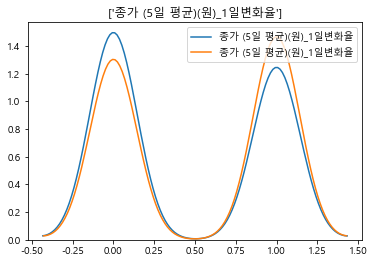

*******************s**한온시스템*********************


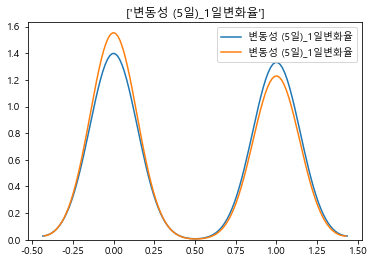

*******************s**한온시스템*********************


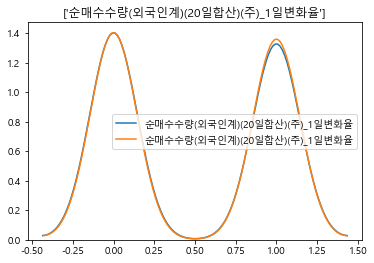

*******************s**한온시스템*********************


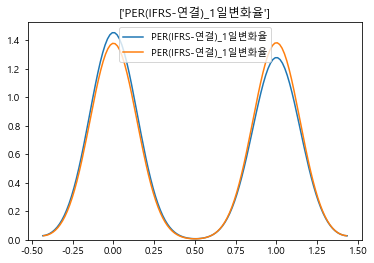

*******************s**한온시스템*********************


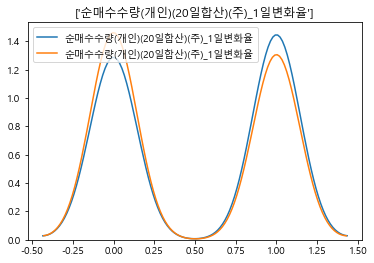

*******************s**한온시스템*********************


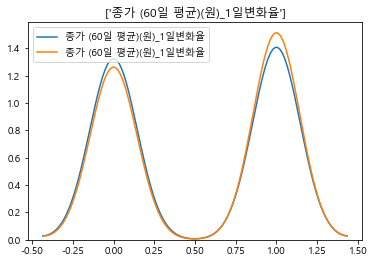

*******************s**한온시스템*********************


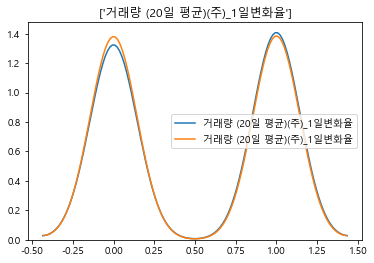

*******************s**한온시스템*********************


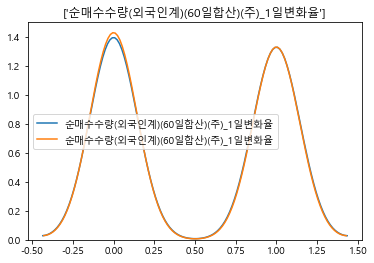

*******************s**한온시스템*********************


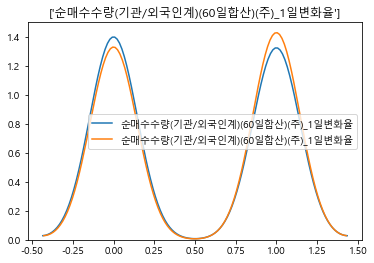

*******************s**한온시스템*********************


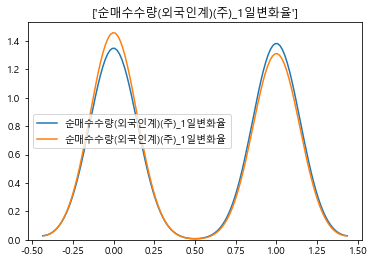

*******************s**한온시스템*********************


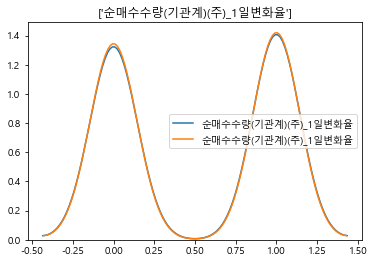

*******************s**한온시스템*********************


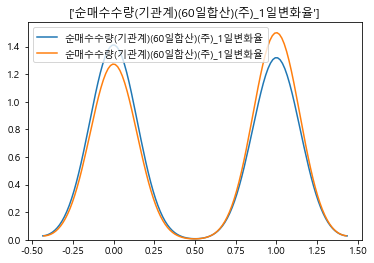

*******************s**한온시스템*********************


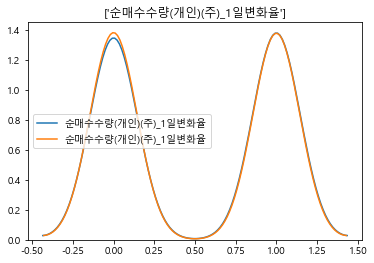

*******************s**한온시스템*********************


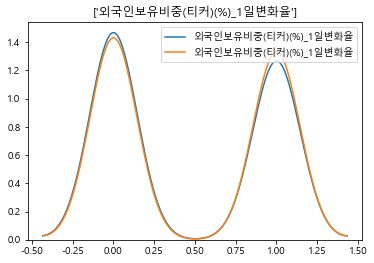

*******************s**한온시스템*********************


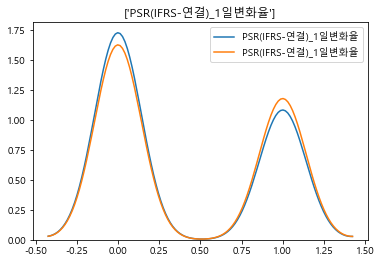

*******************s**한온시스템*********************


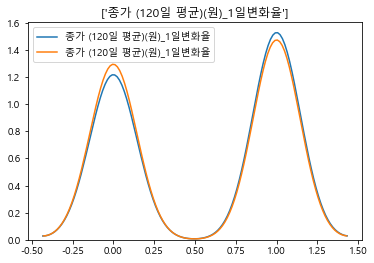

*******************s**한온시스템*********************


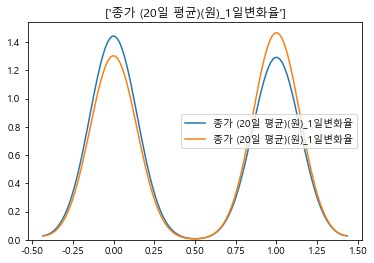

*******************s**한온시스템*********************


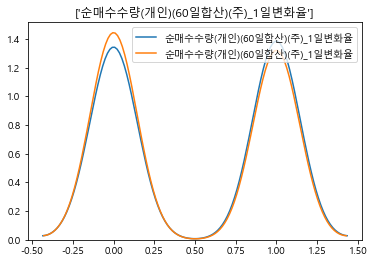

*******************s**한온시스템*********************


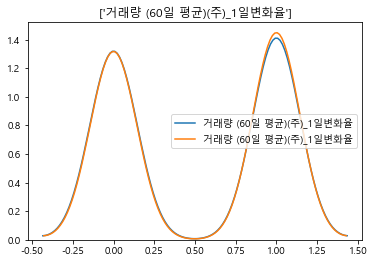

*******************s**한온시스템*********************


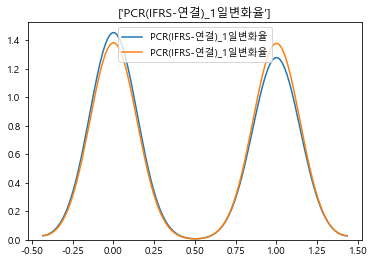

*******************s**한온시스템*********************


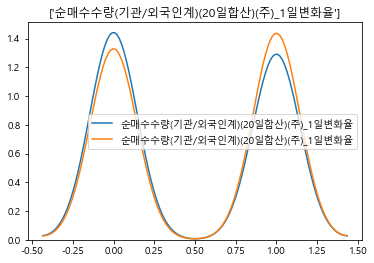

*******************s**한온시스템*********************


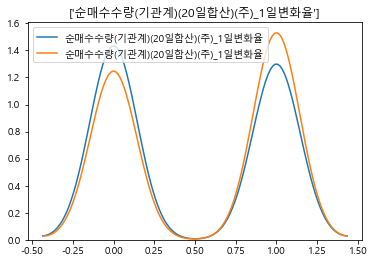

*******************s**한온시스템*********************


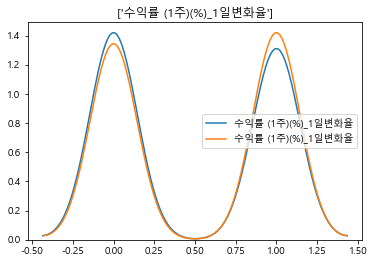

*******************s**한온시스템*********************


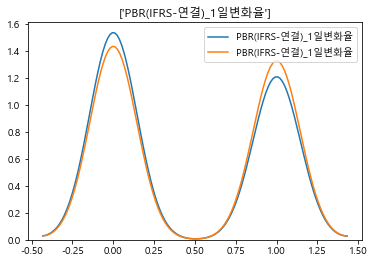

*******************s**한온시스템*********************


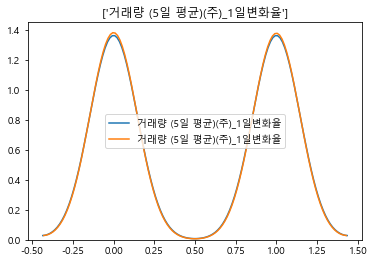

*******************s**한온시스템*********************


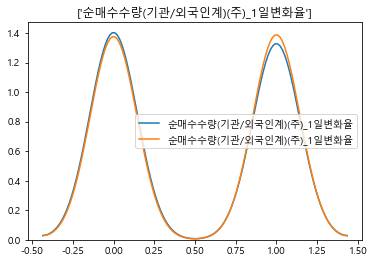

*******************s**한온시스템*********************


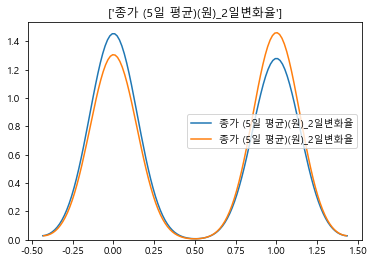

*******************s**한온시스템*********************


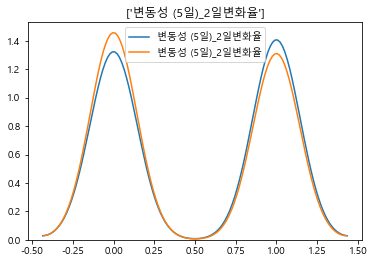

*******************s**한온시스템*********************


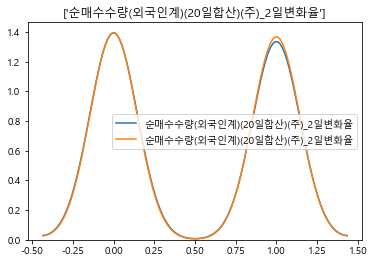

*******************s**한온시스템*********************


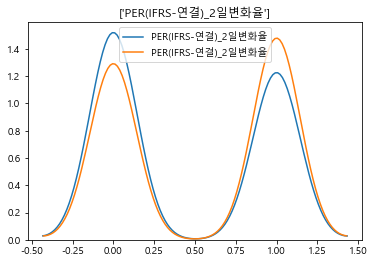

*******************s**한온시스템*********************


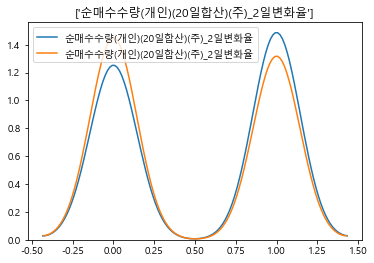

*******************s**한온시스템*********************


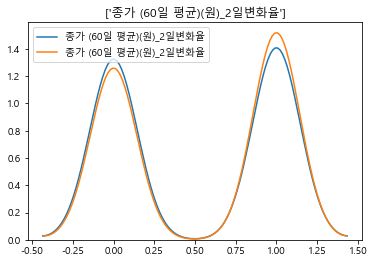

*******************s**한온시스템*********************


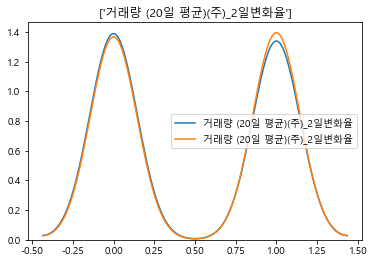

*******************s**한온시스템*********************


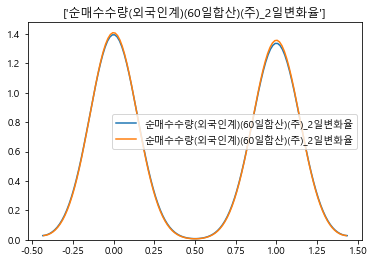

*******************s**한온시스템*********************


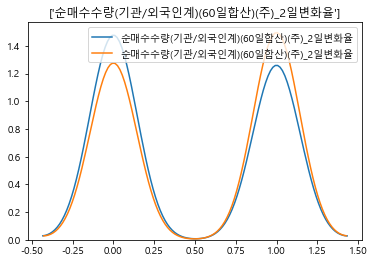

*******************s**한온시스템*********************


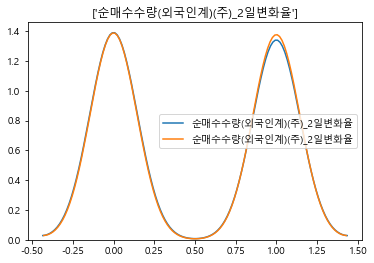

*******************s**한온시스템*********************


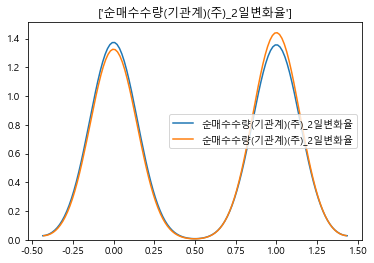

*******************s**한온시스템*********************


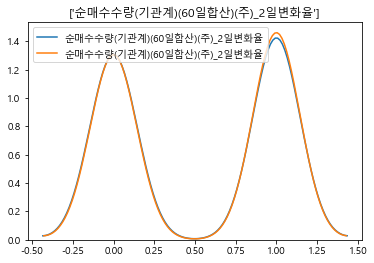

*******************s**한온시스템*********************


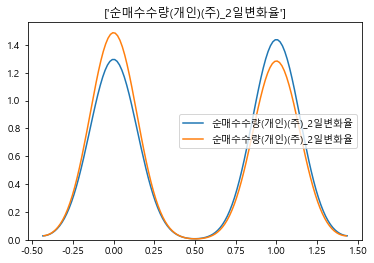

*******************s**한온시스템*********************


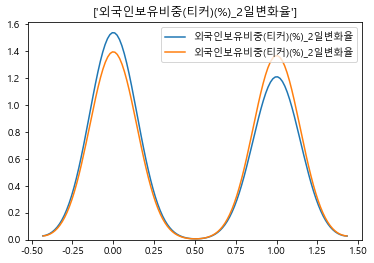

*******************s**한온시스템*********************


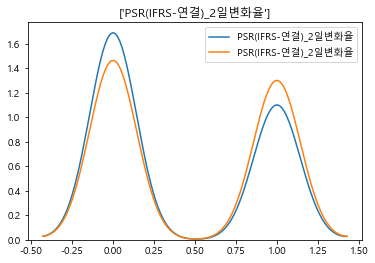

*******************s**한온시스템*********************


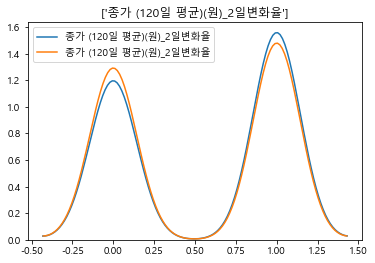

*******************s**한온시스템*********************


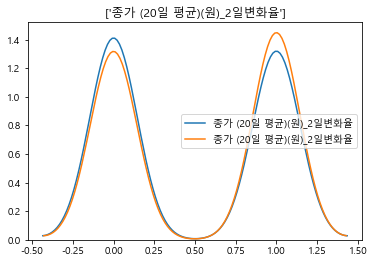

*******************s**한온시스템*********************


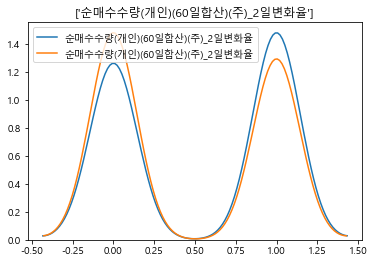

*******************s**한온시스템*********************


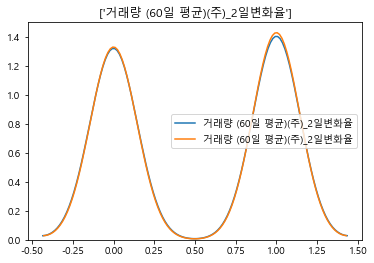

*******************s**한온시스템*********************


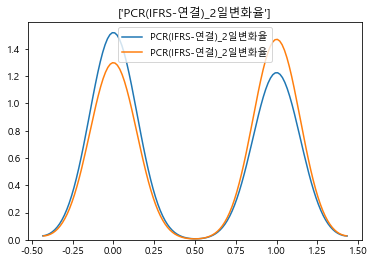

*******************s**한온시스템*********************


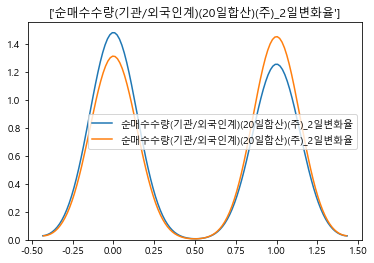

*******************s**한온시스템*********************


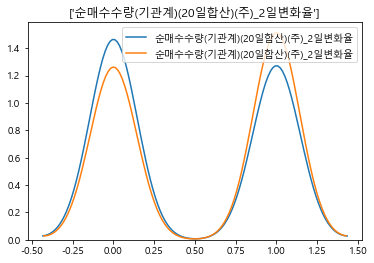

*******************s**한온시스템*********************


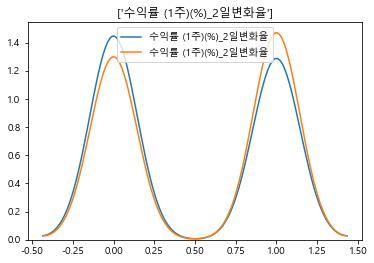

*******************s**한온시스템*********************


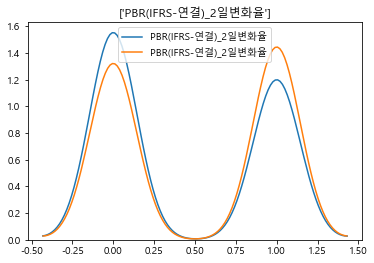

*******************s**한온시스템*********************


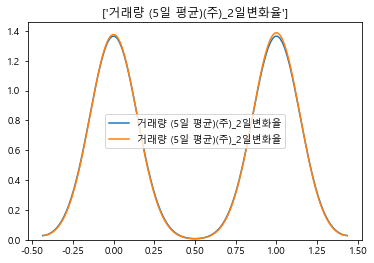

*******************s**한온시스템*********************


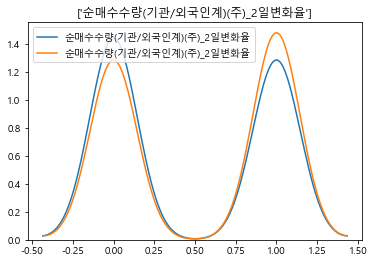

*******************s**한온시스템*********************


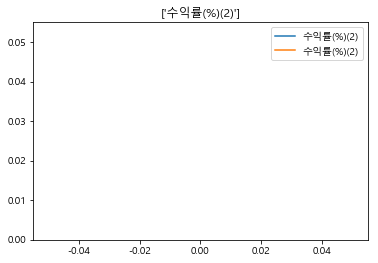

In [5]:
K='한온시스템'
for i in col[:-1]:
    sns.kdeplot(data=data[data['수익률(%)(2)'] == 1][i])
    sns.kdeplot(data=data[data['수익률(%)(2)'] == 0][i])
    plt.title([i])
    print('*******************s**{}*********************'.format(K))
    plt.show()

In [6]:
def data_sp(data,day):
    com_name_set = list(set(data.Name))
    
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-day])
        test_set = test_set.append(sub_set[-day:])
    return train_set , test_set

In [25]:
train, test = data_sp(data,60)

In [8]:
print(train.shape,test.shape)

(1289, 54) (60, 54)


### 2진화한 데이터셋 분석
## xgboost

In [12]:
## 60일 결과

colsss = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율', 'PER(IFRS-연결)_1일변화율',
       '순매수수량(개인)(20일합산)(주)_1일변화율', '종가 (60일 평균)(원)_1일변화율',
       '거래량 (20일 평균)(주)_1일변화율', '순매수수량(외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율', '순매수수량(외국인계)(주)_1일변화율',
       '순매수수량(기관계)(주)_1일변화율', '순매수수량(기관계)(60일합산)(주)_1일변화율',
       '순매수수량(개인)(주)_1일변화율', '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율',
       '종가 (120일 평균)(원)_1일변화율', '종가 (20일 평균)(원)_1일변화율',
       '순매수수량(개인)(60일합산)(주)_1일변화율', '거래량 (60일 평균)(주)_1일변화율',
       'PCR(IFRS-연결)_1일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
       '순매수수량(기관계)(20일합산)(주)_1일변화율', '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율',
       '거래량 (5일 평균)(주)_1일변화율', '순매수수량(기관/외국인계)(주)_1일변화율',
       '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율', '순매수수량(외국인계)(20일합산)(주)_2일변화율',
       'PER(IFRS-연결)_2일변화율', '순매수수량(개인)(20일합산)(주)_2일변화율',
       '종가 (60일 평균)(원)_2일변화율', '거래량 (20일 평균)(주)_2일변화율',
       '순매수수량(외국인계)(60일합산)(주)_2일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(외국인계)(주)_2일변화율', '순매수수량(기관계)(주)_2일변화율',
       '순매수수량(기관계)(60일합산)(주)_2일변화율', '순매수수량(개인)(주)_2일변화율',
       '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율', '종가 (120일 평균)(원)_2일변화율',
       '종가 (20일 평균)(원)_2일변화율', '순매수수량(개인)(60일합산)(주)_2일변화율',
       '거래량 (60일 평균)(주)_2일변화율', 'PCR(IFRS-연결)_2일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율', '순매수수량(기관계)(20일합산)(주)_2일변화율',
       '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율', '거래량 (5일 평균)(주)_2일변화율',
       '순매수수량(기관/외국인계)(주)_2일변화율']

accsets = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(48):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier(n_estimators= 1500, n_jobs= -1)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets['features'][i] = colsss
    accsets['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets.iloc[25:42,:3]


,train_val_pro,test_pro,pre_pro
25,0.895268,0.450000,0.485714
26,0.884407,0.450000,0.484848
27,0.873545,0.550000,0.567568
28,0.859581,0.500000,0.527778
29,0.847944,0.500000,0.527778
30,0.848720,0.533333,0.550000
31,0.830877,0.500000,0.527778
32,0.826998,0.516667,0.545455
33,0.804500,0.566667,0.593750
34,0.790535,0.583333,0.600000


In [17]:
accsets.iloc[42][3]

['순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '수익률 (1주)(%)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(외국인계)(20일합산)(주)_2일변화율',
 'PER(IFRS-연결)_2일변화율',
 '순매수수량(외국인계)(주)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']

In [18]:
train, test = data_sp(data,90)

In [19]:
## 90일 결과

colsss = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율', 'PER(IFRS-연결)_1일변화율',
       '순매수수량(개인)(20일합산)(주)_1일변화율', '종가 (60일 평균)(원)_1일변화율',
       '거래량 (20일 평균)(주)_1일변화율', '순매수수량(외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율', '순매수수량(외국인계)(주)_1일변화율',
       '순매수수량(기관계)(주)_1일변화율', '순매수수량(기관계)(60일합산)(주)_1일변화율',
       '순매수수량(개인)(주)_1일변화율', '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율',
       '종가 (120일 평균)(원)_1일변화율', '종가 (20일 평균)(원)_1일변화율',
       '순매수수량(개인)(60일합산)(주)_1일변화율', '거래량 (60일 평균)(주)_1일변화율',
       'PCR(IFRS-연결)_1일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
       '순매수수량(기관계)(20일합산)(주)_1일변화율', '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율',
       '거래량 (5일 평균)(주)_1일변화율', '순매수수량(기관/외국인계)(주)_1일변화율',
       '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율', '순매수수량(외국인계)(20일합산)(주)_2일변화율',
       'PER(IFRS-연결)_2일변화율', '순매수수량(개인)(20일합산)(주)_2일변화율',
       '종가 (60일 평균)(원)_2일변화율', '거래량 (20일 평균)(주)_2일변화율',
       '순매수수량(외국인계)(60일합산)(주)_2일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(외국인계)(주)_2일변화율', '순매수수량(기관계)(주)_2일변화율',
       '순매수수량(기관계)(60일합산)(주)_2일변화율', '순매수수량(개인)(주)_2일변화율',
       '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율', '종가 (120일 평균)(원)_2일변화율',
       '종가 (20일 평균)(원)_2일변화율', '순매수수량(개인)(60일합산)(주)_2일변화율',
       '거래량 (60일 평균)(주)_2일변화율', 'PCR(IFRS-연결)_2일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율', '순매수수량(기관계)(20일합산)(주)_2일변화율',
       '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율', '거래량 (5일 평균)(주)_2일변화율',
       '순매수수량(기관/외국인계)(주)_2일변화율']

accsets2 = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(48):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier(n_estimators= 1500,)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets2['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets2['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets2['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets2['features'][i] = colsss
    accsets2['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets2.iloc[25:42,:3]


,train_val_pro,test_pro,pre_pro
25,0.869738,0.422222,0.441860
26,0.874504,0.433333,0.454545
27,0.862589,0.466667,0.488889
28,0.861795,0.477778,0.500000
29,0.845909,0.555556,0.577778
30,0.829230,0.477778,0.500000
31,0.810167,0.500000,0.522727
32,0.795075,0.566667,0.590909
33,0.791898,0.555556,0.577778
34,0.772836,0.522222,0.543478


In [20]:
accsets2

,train_val_pro,test_pro,pre_pro,features,lenth_of_feature
0,0.961080,0.500000,0.522727,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",52.0
1,0.960286,0.511111,0.530612,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",51.0
2,0.959492,0.500000,0.520833,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",50.0
3,0.956315,0.511111,0.530612,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",49.0
4,0.957109,0.477778,0.500000,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",48.0
5,0.960286,0.488889,0.510638,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",47.0
6,0.957903,0.500000,0.520833,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",46.0
7,0.957109,0.522222,0.541667,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",45.0
8,0.952343,0.488889,0.510204,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",44.0
9,0.953932,0.555556,0.571429,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",43.0


In [22]:
train, test = data_sp(data,120)

In [23]:
## 120일 결과

colsss = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율', 'PER(IFRS-연결)_1일변화율',
       '순매수수량(개인)(20일합산)(주)_1일변화율', '종가 (60일 평균)(원)_1일변화율',
       '거래량 (20일 평균)(주)_1일변화율', '순매수수량(외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율', '순매수수량(외국인계)(주)_1일변화율',
       '순매수수량(기관계)(주)_1일변화율', '순매수수량(기관계)(60일합산)(주)_1일변화율',
       '순매수수량(개인)(주)_1일변화율', '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율',
       '종가 (120일 평균)(원)_1일변화율', '종가 (20일 평균)(원)_1일변화율',
       '순매수수량(개인)(60일합산)(주)_1일변화율', '거래량 (60일 평균)(주)_1일변화율',
       'PCR(IFRS-연결)_1일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
       '순매수수량(기관계)(20일합산)(주)_1일변화율', '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율',
       '거래량 (5일 평균)(주)_1일변화율', '순매수수량(기관/외국인계)(주)_1일변화율',
       '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율', '순매수수량(외국인계)(20일합산)(주)_2일변화율',
       'PER(IFRS-연결)_2일변화율', '순매수수량(개인)(20일합산)(주)_2일변화율',
       '종가 (60일 평균)(원)_2일변화율', '거래량 (20일 평균)(주)_2일변화율',
       '순매수수량(외국인계)(60일합산)(주)_2일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(외국인계)(주)_2일변화율', '순매수수량(기관계)(주)_2일변화율',
       '순매수수량(기관계)(60일합산)(주)_2일변화율', '순매수수량(개인)(주)_2일변화율',
       '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율', '종가 (120일 평균)(원)_2일변화율',
       '종가 (20일 평균)(원)_2일변화율', '순매수수량(개인)(60일합산)(주)_2일변화율',
       '거래량 (60일 평균)(주)_2일변화율', 'PCR(IFRS-연결)_2일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율', '순매수수량(기관계)(20일합산)(주)_2일변화율',
       '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율', '거래량 (5일 평균)(주)_2일변화율',
       '순매수수량(기관/외국인계)(주)_2일변화율']

accsets3 = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(42):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier(n_estimators= 1500,n_jobs=-1)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets3['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets3['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets3['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets3['features'][i] = colsss
    accsets3['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets3.iloc[25:42,:3]


,train_val_pro,test_pro,pre_pro
25,0.895850,0.525000,0.523810
26,0.884459,0.558333,0.557377
27,0.875509,0.550000,0.550000
28,0.864117,0.591667,0.590164
29,0.856794,0.550000,0.548387
30,0.837266,0.583333,0.578125
31,0.826688,0.608333,0.618182
32,0.806347,0.600000,0.607143
33,0.804719,0.600000,0.611111
34,0.768104,0.591667,0.593220


In [24]:
accsets3

,train_val_pro,test_pro,pre_pro,features,lenth_of_feature
0,0.966640,0.458333,0.457627,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",52.0
1,0.965826,0.441667,0.442623,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",51.0
2,0.962571,0.425000,0.426230,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",50.0
3,0.962571,0.475000,0.475410,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",48.0
4,0.962571,0.475000,0.475410,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",47.0
5,0.965012,0.416667,0.416667,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",46.0
6,0.965826,0.441667,0.440678,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",45.0
7,0.963385,0.466667,0.464286,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",44.0
8,0.961758,0.466667,0.467742,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",43.0
9,0.965826,0.466667,0.464286,"[종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...",42.0


Text(0.5,0,'변수 제거 단계')

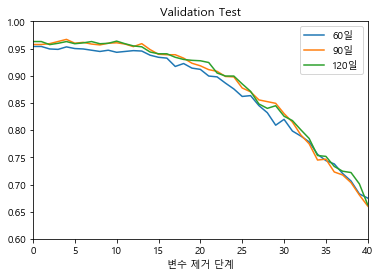

In [11]:
plt.plot(accsets['train_val_pro'],label="60일")
plt.plot(accsets2['train_val_pro'],label="90일")
plt.plot(accsets3['train_val_pro'],label="120일")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.6, 1)
plt.title('Validation Test')
plt.xlabel('변수 제거 단계')

Text(0.5,0,'변수 제거 단계')

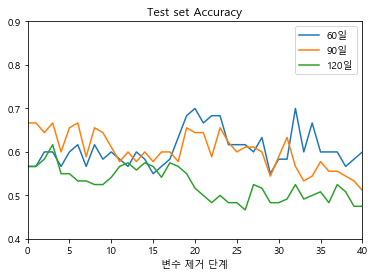

In [16]:
plt.plot(accsets['test_pro'],label="60일")
plt.plot(accsets2['test_pro'],label="90일")
plt.plot(accsets3['test_pro'],label="120일")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.4, 0.9)
plt.title('Test set Accuracy')
plt.xlabel('변수 제거 단계')

Text(0.5,0,'변수 제거 단계')

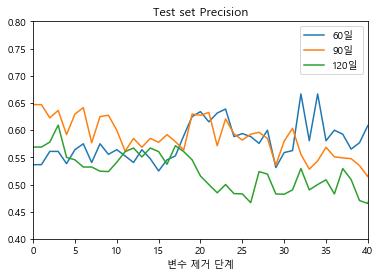

In [14]:
plt.plot(accsets['pre_pro'],label="60일")
plt.plot(accsets2['pre_pro'],label="90일")
plt.plot(accsets3['pre_pro'],label="120일")
plt.legend(loc=1)
plt.xlim(0, 40)
plt.ylim(0.4, 0.8)
plt.title('Test set Precision')
plt.xlabel('변수 제거 단계')

Text(0.5,0,'변수 제거 단계')

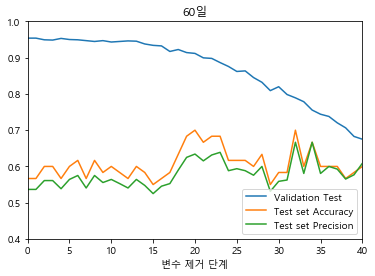

In [15]:
plt.plot(accsets['train_val_pro'],label="Validation Test")
plt.plot(accsets['test_pro'],label="Test set Accuracy")
plt.plot(accsets['pre_pro'],label="Test set Precision")
plt.legend(loc=4)
plt.xlim(0, 40)
plt.ylim(0.4, 1)
plt.title('60일')
plt.xlabel('변수 제거 단계')

In [41]:
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

## 70% 이상 같은 변수들을 1개씩 지우고 성능 변화 체크
 - 성능이 많이 떨어진다 그러므로 다 넣어서 분석

In [7]:
train, test = data_sp(data,60)

In [42]:
## 동질성을 가지는 칼럼 파악
for i in colsss:
    for k in colsss:
        if i != k and (final_dataset[i] == final_dataset[k]).sum()/len(final_dataset)>0.7:
            print(i,k,(final_dataset[i] == final_dataset[k]).sum()/len(final_dataset))

변동성 (5일)_1일변화율 변동성 (5일)_2일변화율 0.7677655677655678
순매수수량(외국인계)(20일합산)(주)_1일변화율 외국인보유비중(티커)(%)_1일변화율 0.7457875457875458
외국인보유비중(티커)(%)_1일변화율 순매수수량(외국인계)(20일합산)(주)_1일변화율 0.7457875457875458
외국인보유비중(티커)(%)_1일변화율 외국인보유비중(티커)(%)_2일변화율 0.8043956043956044
종가 (120일 평균)(원)_1일변화율 종가 (60일 평균)(원)_2일변화율 0.747985347985348
변동성 (5일)_2일변화율 변동성 (5일)_1일변화율 0.7677655677655678
종가 (60일 평균)(원)_2일변화율 종가 (120일 평균)(원)_1일변화율 0.747985347985348
순매수수량(외국인계)(60일합산)(주)_2일변화율 외국인보유비중(티커)(%)_2일변화율 0.7347985347985349
외국인보유비중(티커)(%)_2일변화율 외국인보유비중(티커)(%)_1일변화율 0.8043956043956044
외국인보유비중(티커)(%)_2일변화율 순매수수량(외국인계)(60일합산)(주)_2일변화율 0.7347985347985349


In [63]:
# '변동성 (5일)_1일변화율'
colsss = ['순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.75862, acc: 0.61667, pre:0.6


In [64]:
# '변동성 (5일)_2일변화율'
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.74483, acc: 0.61667, pre:0.57895


In [65]:
# '외국인보유비중(티커)(%)_1일변화율'
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.75939, acc: 0.65, pre:0.61765


In [66]:
# '외국인보유비중(티커)(%)_2일변화율',
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.75402, acc: 0.58333, pre:0.55263


In [67]:
# '순매수수량(외국인계)(60일합산)(주)_2일변화율'
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.76475, acc: 0.61667, pre:0.57895


In [68]:
#  '종가 (60일 평균)(원)_2일변화율'
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.75402, acc: 0.7, pre:0.67742


In [69]:
#  ''종가 (120일 평균)(원)_1일변화율'
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.76015, acc: 0.61667, pre:0.58824


## 최종적으로 사용할  변수

In [241]:
col = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

In [227]:
X_train = train[col]
X_test = test[col]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500, n_jobs = -1)
model.fit(X_train[col] ,Y_train)
a = model.predict(X_train[col])
b = model.predict(X_test[col])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.78927, acc: 0.7, pre:0.66667


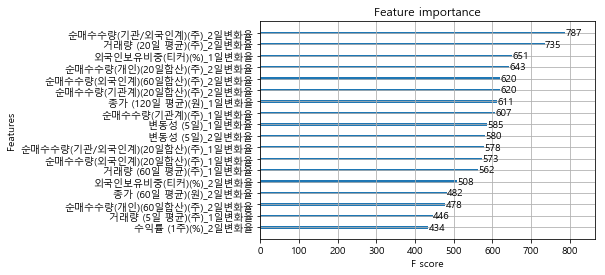

In [72]:
plot_importance(model)

### 이 후 부터는파라미터 튜닝을 해야해서 다른 컴퓨터에서 진행해서 파일이 다릅니다!!
parameter_tuning 파일을 참고해주세요